In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [3]:
#importing the dataset
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =  train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [7]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

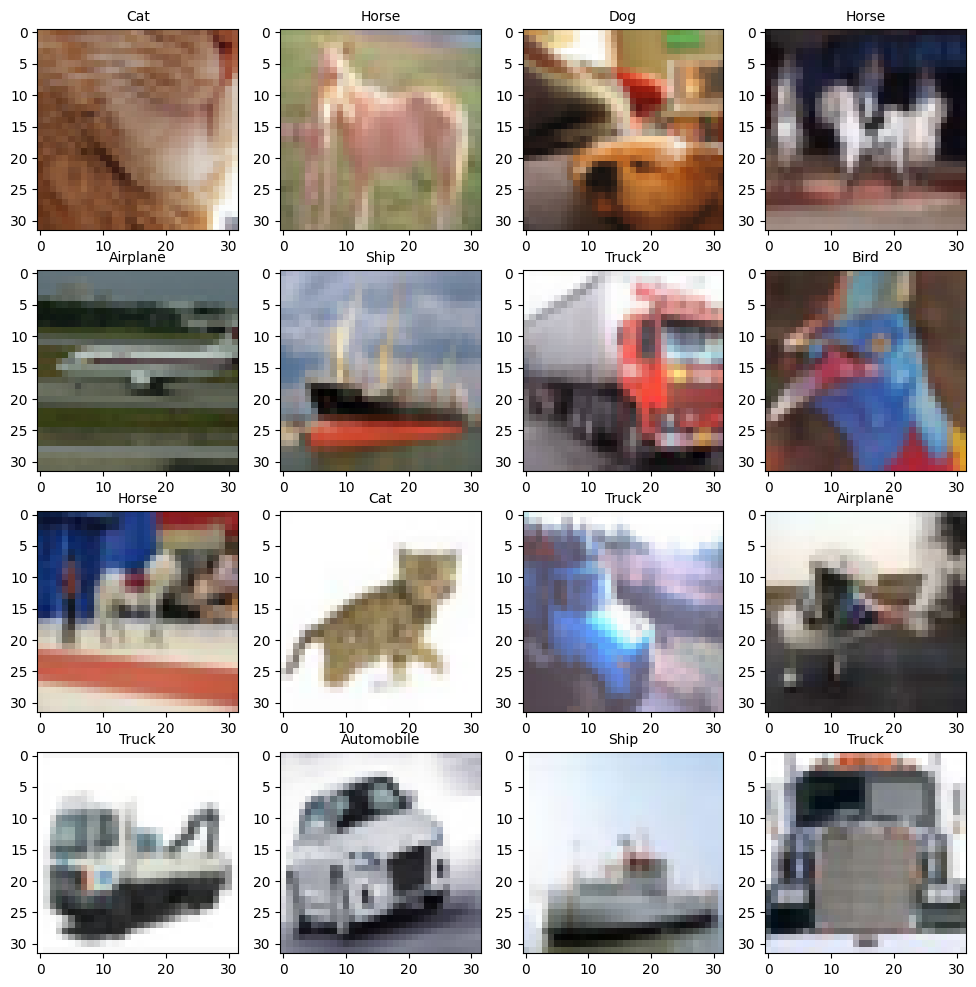

In [8]:
classes=["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]], fontsize= 10)
plt.show()

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
mean = np.mean(x_train)
std  = np.std(x_train)

In [11]:
print(mean, std)

120.70063406575521 64.15108741792801


In [12]:
x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean) /(std+1e-7)
x_val = (x_val-mean)/(std+1e-7)

In [13]:
for i in range(20):
  print(y_train[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip= True,
    zoom_range=0.1,

)

In [15]:
model= Sequential()
# CV1 1 layer
model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
#2 layer
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#3 layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#CV2 4 layer
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#5 layer
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#6 layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
#CV3 7 layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#8 layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#9 layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#10 layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
#CV4 11 layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#12 layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#13 layer
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#14 layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#CV5 15 layer
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#16 layer
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#17 layer
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
#18 layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.6))
#F 19 layer
model.add(Flatten())
#D1 20 layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
#D2 21 layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.8))
#D3 22 layer
model.add(Dense(10, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,010,842 (7.67 MB)

 Trainable params: 2,007,450 (7.66 MB)

 Non-trainable params: 3,392 (13.25 KB)

In [18]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape, x_test.shape, y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 32, 32, 3),
 (10000, 10))

In [18]:
optimizer= Adam(learning_rate=0.01, epsilon=1e-07)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
early_stopping= EarlyStopping(monitor='val_loss', patience=30, verbose=1)
model.fit(x_train, y_train, batch_size=128, epochs=200, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/200


I0000 00:00:1733038012.639110      99 service.cc:145] XLA service 0x7a49cc002740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733038012.639175      99 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 16/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0897 - loss: 4.2966

I0000 00:00:1733038028.243961      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.1337 - loss: 2.7155 - val_accuracy: 0.2013 - val_loss: 2.0522
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2278 - loss: 1.9410 - val_accuracy: 0.3322 - val_loss: 1.6924
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2985 - loss: 1.7538 - val_accuracy: 0.3690 - val_loss: 1.6130
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3433 - loss: 1.6423 - val_accuracy: 0.3968 - val_loss: 1.5337
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3912 - loss: 1.5566 - val_accuracy: 0.4611 - val_loss: 1.4203
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4407 - loss: 1.4780 - val_accuracy: 0.5418 - val_loss: 1.3358
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4962 - loss: 1.3832 - val_accuracy: 0.5106 - val_loss: 1.3968
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5337 - loss: 1.3198 - val_accurac

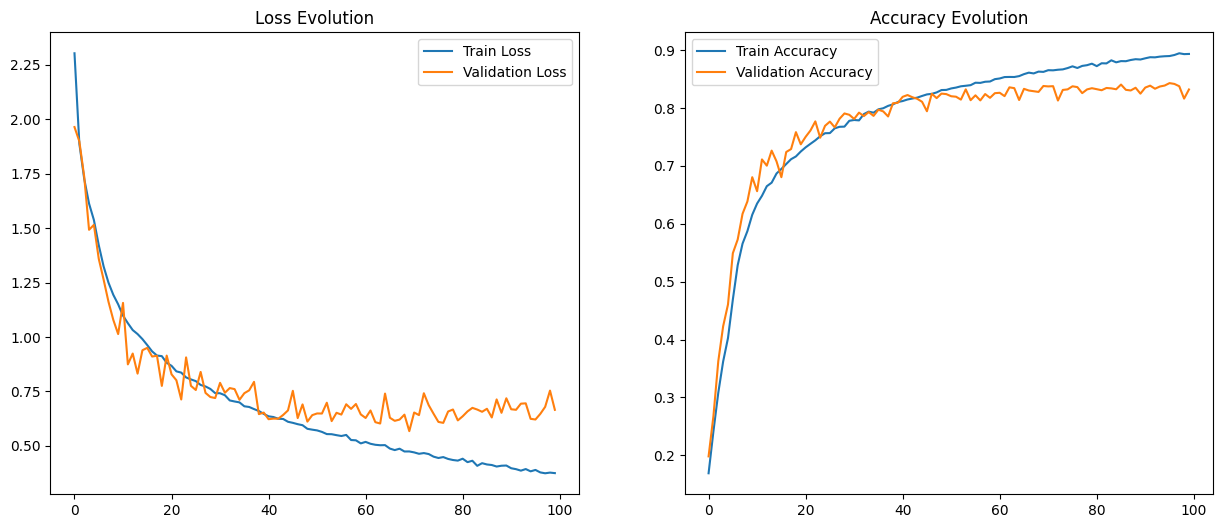

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8300 - loss: 0.6896

Test Accuracy: 0.8306999802589417
Test Loss:     0.6906129121780396


In [25]:
import cv2


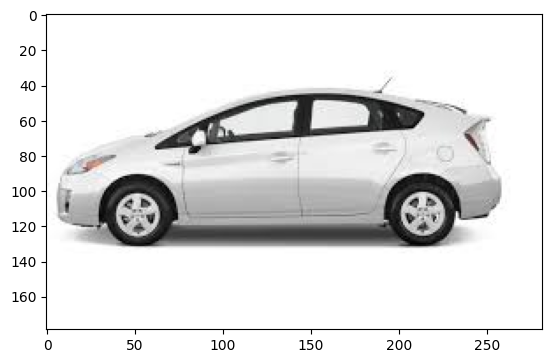

In [29]:
image3_path= '/kaggle/input/testing-images/d1.jpg'
image3= cv2.imread(image3_path)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)

In [30]:
image3 = cv2.resize(image3, (32,32))
image3 = (image3-mean)/(std+1e-7)
image3 = image3.reshape((1, 32, 32, 3))

In [31]:
prediction3 = model.predict(image3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step


In [33]:
predicted_class3 = prediction3.argmax()
print('Predicted class: ', classes[predicted_class3])

Predicted class:  Automobile


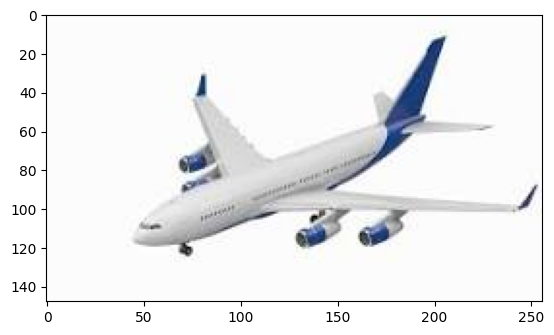

In [38]:
image2_path= '/kaggle/input/testing-images/a1.jpg'
image2= cv2.imread(image2_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

In [39]:
image2 = cv2.resize(image2, (32,32))
image2 = (image2-mean)/(std+1e-7)
image2 = image2.reshape((1, 32, 32, 3))

In [40]:
prediction2 = model.predict(image2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [41]:
predicted_class2 = prediction2.argmax()

print('Predicted class: ', classes[predicted_class2])

Predicted class:  Airplane


ONNX

In [43]:
!pip install tf2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 10.8 MB/s eta 0:00:0000:01


In [45]:
import onnx
import tf2onnx

In [57]:
import tf2onnx
print(tf2onnx.__version__)

1.16.1


In [63]:
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.16.1


In [62]:
pip install tensorflow==2.15.1


Note: you may need to restart the kernel to use updated packages.


In [49]:
model.save("vgg16.h5")

In [64]:
model = tf.keras.models.load_model("vgg16.h5", compile=False)

In [65]:
input_signature= [tf.TensorSpec([None, 32, 32, 3], tf.float32)]

In [69]:
model.output_names = ['output']

In [71]:
onnx_model,_ = tf2onnx.convert.from_keras(model, input_signature=input_signature, opset=13)
onnx.save(onnx_model, 'vgg16.onnx')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('input_signature', 'model'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
